# Dependencies loading

In [1]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning

np.random.seed(2024)

# Data loading

In [2]:
data = pd.read_csv('input_data/X_train.csv',index_col=0)
data_test = pd.read_csv('input_data/X_test.csv', index_col=0)

In [3]:
data.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Marital_Status,Gender
0,27.0,0.0,3.0,2.0,0.0,36.0,5.0,1.0,0.0,13439.0,...,11436.0,0.936,4715.0,86.0,0.720,0.149,0.0,1.0,Married,M
1,46.0,0.0,0.0,2.0,1.0,36.0,6.0,3.0,2.0,30501.0,...,28471.0,0.560,2525.0,45.0,0.500,0.067,0.0,0.0,Single,F
2,46.0,2.0,1.0,0.0,0.0,37.0,3.0,1.0,1.0,6118.0,...,5026.0,0.757,4434.0,81.0,0.620,0.178,0.0,0.0,Married,M
3,57.0,2.0,3.0,0.0,0.0,45.0,6.0,2.0,2.0,1438.3,...,698.3,0.698,4970.0,87.0,0.933,0.514,0.0,0.0,Married,F
4,56.0,1.0,2.0,3.0,0.0,36.0,3.0,3.0,3.0,34516.0,...,33039.0,1.234,2395.0,50.0,0.724,0.043,0.0,0.0,Married,M


In [4]:
data_test.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_NA,Income_Category_NA,Marital_Status,Gender
7,45.0,5.0,1.0,2.0,0.0,37.0,3.0,1.0,3.0,15626.0,...,14478.0,1.028,3386.0,65.0,0.711,0.073,0.0,0.0,Married,M
10,57.0,4.0,2.0,3.0,0.0,36.0,5.0,3.0,4.0,7558.0,...,6194.0,0.719,3676.0,67.0,0.558,0.180,1.0,0.0,Married,M
12,44.0,5.0,1.0,3.0,0.0,37.0,4.0,2.0,3.0,15638.0,...,13909.0,0.843,4396.0,83.0,0.566,0.111,0.0,0.0,Single,M
14,63.0,2.0,3.0,2.0,0.0,49.0,5.0,2.0,3.0,14035.0,...,11974.0,2.271,1606.0,30.0,1.500,0.147,0.0,0.0,Married,F
18,48.0,3.0,2.0,3.0,0.0,41.0,2.0,3.0,3.0,3430.0,...,913.0,0.869,2639.0,46.0,0.643,0.734,0.0,0.0,Married,M


# Feature engineering

## One dimensional

### Categorical variables

We converted the categorical variables—Income_Category, Education_Level, and Card_Category—into ordinal numerical values. This transformation was driven by the significance of order and hierarchy within these variables. 

Now we are left with Gender and Marital Status, in this case we will perform one-hot encoding. We are going to drop first category to ommit collinearity issue.

#### Gender

In [5]:
data = pd.get_dummies(data, columns = ['Gender'], prefix = ["Gender"], drop_first = True)

In [6]:
data_test = pd.get_dummies(data_test, columns = ['Gender'], prefix = ["Gender"], drop_first = True)

#### Marital status

In [7]:
data = pd.get_dummies(data, columns = ['Marital_Status'], prefix = ["MS"], drop_first = True)

In [8]:
data_test = pd.get_dummies(data_test, columns = ['Marital_Status'], prefix = ["MS"], drop_first = True)

Since we've got a bunch of variables with money values in our dataset, doing a log transformation could be a good move. It's a handy trick to tone down the variability in these cases.

### Total transaction amount

Total transaction amount as seen earlier follows wired distribution. 

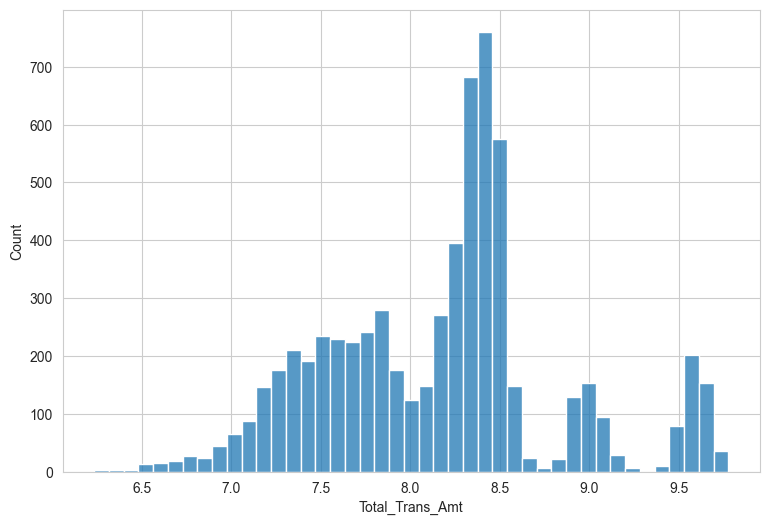

In [9]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['Total_Trans_Amt']))
plt.show()

In [10]:
data['ln_Total_Trans_Amt'] = np.log(data['Total_Trans_Amt'])
data_test['ln_Total_Trans_Amt'] = np.log(data_test['Total_Trans_Amt'])

The application of logarithm transformation could be beneficial in our analysis by potentially reducing variance.

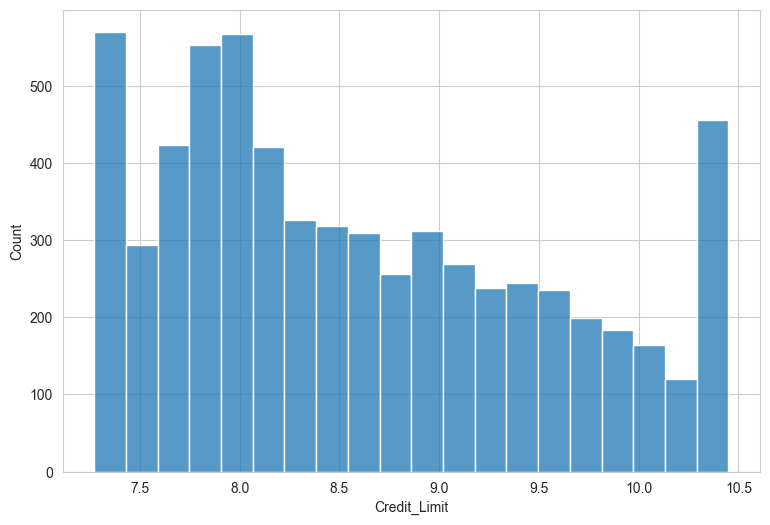

In [11]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['Credit_Limit']))
plt.show()

In [12]:
data['ln_Credit_Limit'] = np.log(data['Credit_Limit'])
data_test['ln_Credit_Limit'] = np.log(data_test['Credit_Limit'])

## Multi dimensional

### Average transaction

It may be worth to include into our analysis transformation of Total_Trans_Amt and Total_Trans_Ct

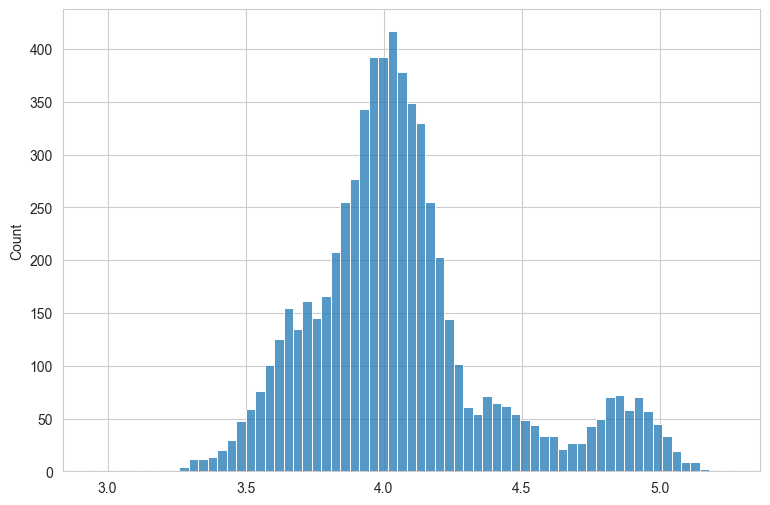

In [13]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(np.log(data['Total_Trans_Amt']/data['Total_Trans_Ct']))
plt.show()

### Credit utilization

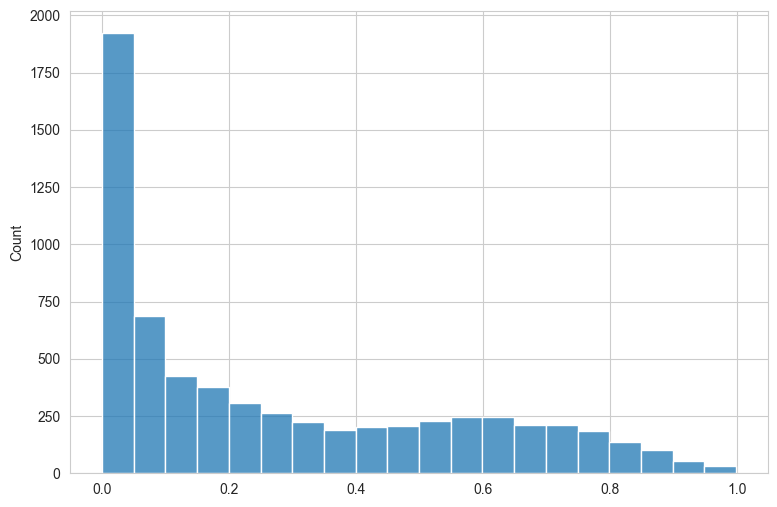

In [14]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data['Total_Revolving_Bal']/data['Credit_Limit'])
plt.show()

# SMOTE 